In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Datasets
imdb_names = pd.read_csv('data/imdb_names_update', index_col='tconst')
imdb_titles = pd.read_csv('data/imdb_titles', index_col='tconst')
imdb_tn_budgets = pd.read_csv('data/tn_movies_bud_update')


In [3]:
# Drop 'unnamed: 0' column from tn_movie_budget dataframe
imdb_tn_budgets.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
imdb_names.head()

,primary_name,nconst,primary_profession
tconst,,,
tt0837562,Mary Ellen Bauder,nm0061671,"miscellaneous,production_manager,producer"
tt0896534,Joseph Bauer,nm0061865,"composer,music_department,sound_department"
tt1470654,Bruce Baum,nm0062070,"miscellaneous,actor,writer"
tt0114371,Axel Baumann,nm0062195,"camera_department,cinematographer,art_department"
tt0452644,Pete Baxter,nm0062798,"production_designer,art_department,set_decorator"


In [5]:
imdb_titles.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,NaN
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,NaN,NaN


In [6]:
imdb_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,remade,international_gross,online_release,release_year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,804600000,False,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,False,944008095,False,2015
2,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,696540365,False,2017
3,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,False,1116648995,False,2015
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,False,1369318718,False,2018


### 1. Join Dataframes 

Join imdb_titles and imdb_names dataframes

In [7]:
imdb_titles_names = imdb_titles.join(imdb_names, how='inner')
imdb_titles_names.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,primary_name,nconst,primary_profession
tconst,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,Mahasweta Devi,nm1194313,writer
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,Anjana Rawail,nm1391276,"writer,costume_designer"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Oja Kodar,nm0462648,"actress,writer,director"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Tom Callaway,nm1152466,"cinematographer,camera_department"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,NaN,NaN,Dax Phelan,nm3902034,"writer,producer,director"


In [8]:
imdb_titles_names.reset_index(inplace=True)

In [9]:
# only include directors in this dataset 
imdb_title_name_directors = imdb_titles_names[imdb_titles_names['primary_profession'].str.contains('director')]

In [10]:
imdb_title_name_directors.loc[imdb_title_name_directors['tconst']=='tt1270798']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,primary_name,nconst,primary_profession
19442,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Tez Palmer,nm0658468,"special_effects,director,writer"
19452,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Brian L. Tan,nm2792411,"producer,director,visual_effects"
19458,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Sheldon Turner,nm1417242,"writer,producer,director"
19460,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Cameron Lawther,nm3760436,"miscellaneous,producer,assistant_director"
19461,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Todd Reynolds,nm4394275,"assistant_director,miscellaneous,editor"
19468,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,André Freitas,nm0293920,"make_up_department,special_effects,director"
19472,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Matthew Vaughn,nm0891216,"producer,writer,director"
19474,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Larry D. Katz,nm1097716,"assistant_director,miscellaneous,producer"
19478,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Hakim Robinson,nm2358339,"sound_department,producer,director"
19481,tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Jonathan Stow,nm2644701,"director,miscellaneous,editor"


In [11]:
# the same movie appears many times
# imdb_titles_names.tconst.value_counts()

Join imdb_titles_names dataframe with imdb_ratings

In [12]:
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [13]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
imdb_title_name_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183584 entries, 2 to 713874
Data columns (total 12 columns):
tconst                183584 non-null object
primary_title         183584 non-null object
original_title        183584 non-null object
start_year            183584 non-null int64
runtime_minutes       158004 non-null float64
genres                180501 non-null object
genres_1              180501 non-null object
genres_2              95127 non-null object
genres_3              53289 non-null object
primary_name          183584 non-null object
nconst                183584 non-null object
primary_profession    183584 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 18.2+ MB


In [15]:
imdb_ratings.set_index('tconst', inplace=True)
imdb_title_name_directors.set_index('tconst', inplace=True)

In [16]:
imdb_title_ratings = imdb_title_name_directors.join(imdb_ratings, 
                              how='inner')

In [17]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119360 entries, tt0069049 to tt9904014
Data columns (total 13 columns):
primary_title         119360 non-null object
original_title        119360 non-null object
start_year            119360 non-null int64
runtime_minutes       110440 non-null float64
genres                118497 non-null object
genres_1              118497 non-null object
genres_2              71851 non-null object
genres_3              41683 non-null object
primary_name          119360 non-null object
nconst                119360 non-null object
primary_profession    119360 non-null object
averagerating         119360 non-null float64
numvotes              119360 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 12.7+ MB


### Data Visualization  

In [18]:
imdb_title_ratings.genres_1.value_counts()

Drama          31556
Comedy         22705
Action         17550
Documentary    16924
Horror          6577
Biography       5538
Adventure       4990
Crime           4786
Thriller        2333
Animation       1075
Romance         1006
Mystery          743
Fantasy          700
Sci-Fi           668
Family           566
Musical          197
Music            191
History          159
Sport             96
Western           80
War               54
News               2
Reality-TV         1
Name: genres_1, dtype: int64

In [19]:
genres_1 = list(imdb_title_ratings.genres_1.unique())
genres_2 = list(imdb_title_name_directors.genres_2.unique())
genres_3 = list(imdb_title_name_directors.genres_3.unique())

genres = genres_1 + genres_2 + genres_3
genres_array = np.array(genres)

In [20]:
genres_unique = np.unique(genres_array)
len(genres_unique)

27

In [21]:
genres_unique

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'nan'], dtype='<U11')

In [22]:
imdb_title_name_directors = imdb_titles_names[imdb_titles_names['primary_profession'].str.contains('director')]

In [23]:
imdb_title_ratings.dropna(inplace=True)

In [24]:
imdb_title_ratings.reset_index(inplace=True)

In [25]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40547 entries, 0 to 40546
Data columns (total 14 columns):
tconst                40547 non-null object
primary_title         40547 non-null object
original_title        40547 non-null object
start_year            40547 non-null int64
runtime_minutes       40547 non-null float64
genres                40547 non-null object
genres_1              40547 non-null object
genres_2              40547 non-null object
genres_3              40547 non-null object
primary_name          40547 non-null object
nconst                40547 non-null object
primary_profession    40547 non-null object
averagerating         40547 non-null float64
numvotes              40547 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 4.3+ MB


In [26]:
imdb_title_ratings.groupby('genres_1').median().sort_values('averagerating')

,start_year,runtime_minutes,averagerating,numvotes
genres_1,,,,
History,2017.0,101.0,4.5,116.0
Horror,2014.0,90.0,5.0,759.0
Musical,2015.0,126.5,5.3,278.0
Family,2016.0,104.0,5.6,102.0
Fantasy,2014.0,91.0,5.7,221.0
Mystery,2014.0,97.0,5.9,429.0
Action,2014.0,105.0,6.2,2676.0
Drama,2014.0,97.0,6.2,383.5
Crime,2014.0,98.0,6.3,500.5


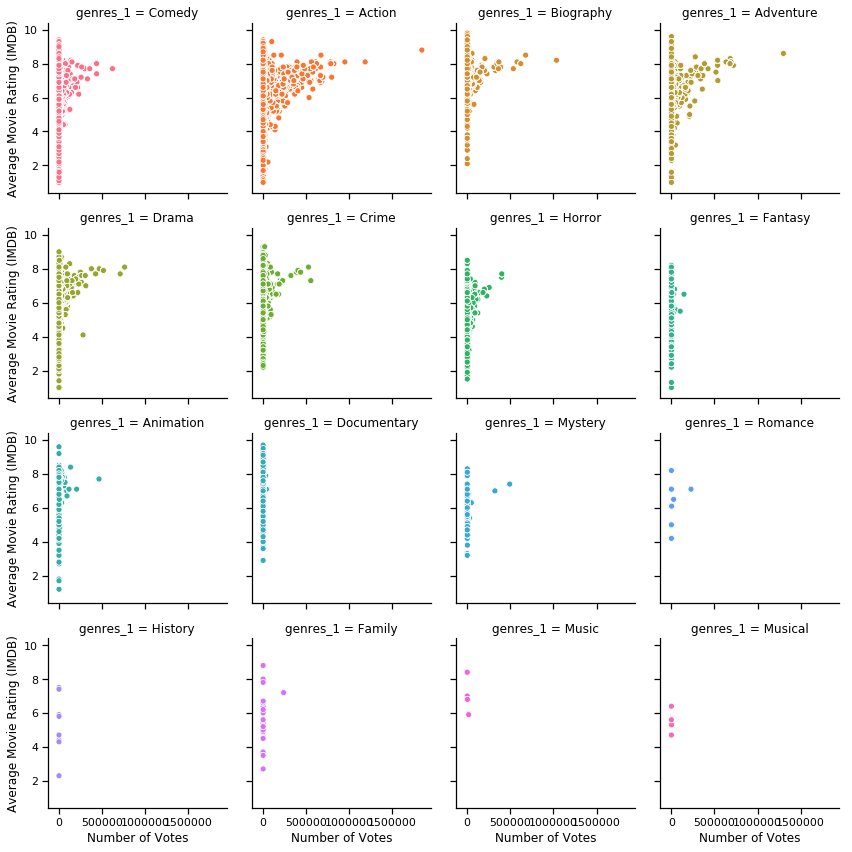

In [27]:
sns.set_context('notebook')
g2 = sns.relplot(y='averagerating', 
            x='numvotes', 
            kind='scatter', 
            hue='genres_1',
            col='genres_1', 
            col_wrap=4,
            height=3,
           data=imdb_title_ratings, 
           legend=None)

axes2 = g2.axes.flatten()

# axes2[0].set_title("Internal")
# axes2[1].set_title("Internal")
# axes2[6].set_title("Internal")

for ax2 in axes2: 
    ax2.set_ylabel("Average Movie Rating (IMDB)")

for ax1 in axes2:
    ax1.set_xlabel("Number of Votes")

    
# g2.savefig('/Users/markishab/Downloads/fig_genres_pop.png')

In [28]:
# choose non-trivial catagories from preceeding visualization 
imdb_genre_set = imdb_title_ratings.loc[(imdb_title_ratings['genres_1']!='Documentary') &
                                        (imdb_title_ratings['genres_1']!='Mystery') &
                                        (imdb_title_ratings['genres_1']!='Romance') &
                                        (imdb_title_ratings['genres_1']!='History') &
                                        (imdb_title_ratings['genres_1']!='Famiily') &
                                        (imdb_title_ratings['genres_1']!='Music') &
                                        (imdb_title_ratings['genres_1']!='Musical')]

In [29]:
# create a column of boolean value for weather the row is any of three values 
imdb_genre_set['color'] = np.where((imdb_genre_set['genres_1']=='Biography') | 
                                   (imdb_genre_set['genres_1']=='Animation') |
                                   (imdb_genre_set['genres_1']=='Adventure'), '1', '0')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


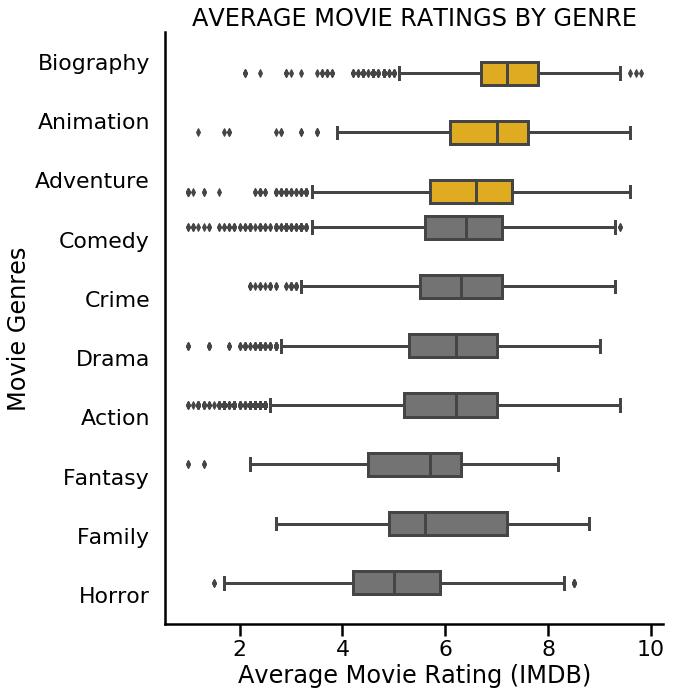

In [60]:
color_palette = ['#737373', '#FFB900']
sns.set_context('poster')
g1 = sns.catplot(x='averagerating',
            y='genres_1', 
           kind='box', 
            col_order=imdb_ratings.averagerating.median(),
            height=10, 
            order=(['Biography', 'Animation', 'Adventure', 'Comedy', 'Crime', 
                    'Drama', 'Action', 'Fantasy', 'Family', 'Horror']),
           data=imdb_genre_set, 
                hue='color',
                 palette=color_palette,
                legend=None)



axes1 = g1.axes.flatten()
axes1[0].set_title("AVERAGE MOVIE RATINGS BY GENRE")
axes1[0].set_ylabel("Movie Genres")

for ax in axes1:
    ax.set_xlabel("Average Movie Rating (IMDB)")

plt.show()
g1.savefig('/Users/markishab/Downloads/fig_genres.png')

#### What directors should we hire 

In [31]:
imdb_title_ratings[imdb_title_ratings['primary_profession'].str.contains('director')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_1,genres_2,genres_3,primary_name,nconst,primary_profession,averagerating,numvotes
0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,Valeria Sarmiento,nm0765384,"editor,director,writer",6.5,119
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,Pía Rey,nm1360635,"set_decorator,art_director,art_department",6.5,119
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,Andrés Racz,nm1856792,"producer,director,writer",6.5,119
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,Raoul Ruiz,nm0749914,"director,writer,producer",6.5,119
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action,Animation,Comedy,Loressa Clisby,nm3388028,"visual_effects,art_director,director",1.9,8248
5,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",Biography,Comedy,Drama,Alex Monty Canawati,nm0133626,"director,writer,actor",5.9,123
6,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",Biography,Comedy,Drama,Stanley Sheff,nm0790758,"editor,director,actor",5.9,123
7,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",Biography,Comedy,Drama,Sylvia B. Suarez,nm0836864,"actress,art_director,production_designer",5.9,123
8,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",Adventure,Animation,Sci-Fi,Rayna Napali,nm3368118,"producer,casting_director",5.1,287
9,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action,Crime,Drama,Neil Nitin Mukesh,nm1778703,"actor,music_department,assistant_director",7.1,15378


In [32]:
imdb_title_ratings.tconst.value_counts().quantile(.9)

5.0

In [33]:
# find the average movie rating by person. This is one of the summary tables
avg_ratings_director = imdb_title_ratings.groupby(['nconst', 'primary_name']).mean().sort_values(by='averagerating'
                                                          , ascending=False).drop(['start_year', 
                                                                                   'runtime_minutes', 
                                                                                  'numvotes'], axis=1)

In [34]:
avg_ratings_director.reset_index(inplace=True)
avg_ratings_director.set_index('nconst', inplace=True)
# avg_ratings_director.drop('index')

In [35]:
avg_ratings_director

,primary_name,averagerating
nconst,,
nm6630411,Dante Tanikie-Montagnani,9.800000
nm0837087,Bill Suchy,9.700000
nm4118957,Thomas Veit,9.700000
nm1618129,Kimberlee Bassford,9.600000
nm6748553,Karzan Kardozi,9.600000
nm6636816,Mahdieh zare Zardiny,9.500000
nm4685060,Matthew Millan,9.400000
nm4679871,Himesh Bhargo,9.400000
nm4014015,Shane Aquino,9.400000


In [36]:
number_movies = imdb_title_ratings.nconst.value_counts().to_frame()

In [37]:
director_scatter = avg_ratings_director.join(number_movies, 
                         how='inner')

In [38]:
director_scatter.rename(columns={'nconst': 'num_movies'}, inplace=True)

In [86]:
direc_scatter_head = director_scatter.head(100)
direc_scatter_head.head(6)

,primary_name,averagerating,num_movies
nm6630411,Dante Tanikie-Montagnani,9.8,1
nm0837087,Bill Suchy,9.7,1
nm4118957,Thomas Veit,9.7,1
nm1618129,Kimberlee Bassford,9.6,1
nm6748553,Karzan Kardozi,9.6,1
nm6636816,Mahdieh zare Zardiny,9.5,1


In [70]:
# create a column of boolean value for weather the row is any of three values 
direc_scatter_head['color'] = np.where((direc_scatter_head['averagerating']>9.4), '1', '0')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


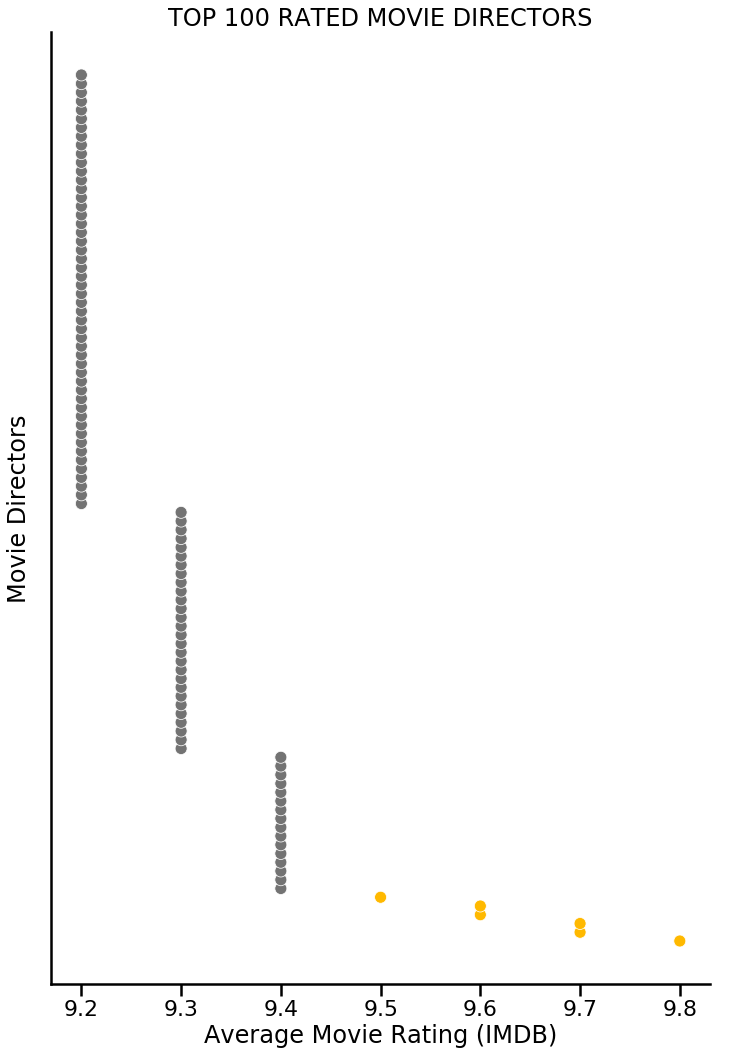

In [85]:
color_palette = ['#737373', '#FFB900']
sns.set_context('poster')
g3 = sns.relplot(y='primary_name', 
           x='averagerating', 
           kind='scatter', 
           data=direc_scatter_head, 
           height=15,
                 hue='color',
                 palette=color_palette,
                legend=None)

g3.set(yticklabels=[])

axes3 = g3.axes.flatten()
axes3[0].set_title("TOP 100 RATED MOVIE DIRECTORS")
axes3[0].set_ylabel("Movie Directors")

for ax in axes3:
    ax.set_xlabel("Average Movie Rating (IMDB)")
g3.savefig('/Users/markishab/Downloads/fig_directors.png')